In [1]:
import numpy as np
import pickle
import jpype
jpype.startJVM(jpype.getDefaultJVMPath())

In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def my_mpl_style():
    '''Sets my preferred style options for matplotlib.'''
    import matplotlib as mpl
    # Font sizes
    mpl.rcParams['axes.labelsize'] = 18
    mpl.rcParams['legend.fontsize'] = 14
    mpl.rcParams['axes.titlesize'] = 20  # Change the number for your preferred fontsize
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 16
    mpl.rcParams['axes.formatter.limits'] = (-2, 3)
my_mpl_style()

In [3]:
def gaussian_function(x, a, I, mu, sig):
    return a + I / np.sqrt(2 * np.pi * sig ** 2) * np.exp(-(x - mu) ** 2 / 2. / sig ** 2)

def do_gaussian_fit(x,y):
    mu = np.average(x, weights=np.abs(y - np.min(y)))
    sigma = np.sqrt(np.average(x**2, weights=np.abs(y - np.min(y))) - mu**2)
    p0 = [y.min(), (np.max(y) - np.min(y)) * np.sqrt(2 * np.pi * sigma**2), mu, sigma]
    popt, pcov = curve_fit(gaussian_function, x, y, p0=p0, maxfev=1000) # maxfev is the number of tries it does the fit
    return popt, pcov

In [4]:
with open('../straggling_ion_data/straggling_ion_2023_09_06_20h28m00s/straggling_ion_2023_09_06_20h28m00s.p', 'rb') as f:
    data = pickle.load(f)

Text(0.5, 0, 'Time LT')

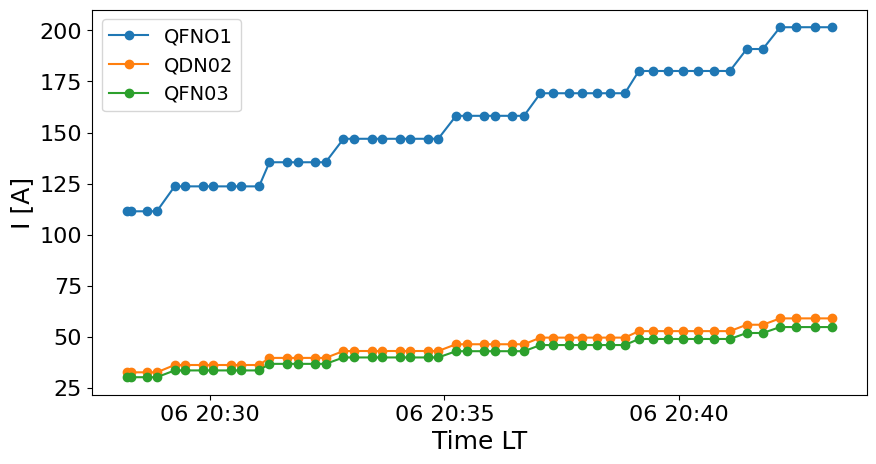

In [5]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data[0], data[3]['F61.QFN01/MEAS.PULSE#VALUE'], marker="o", label="QFNO1")
ax.plot(data[0], data[3]['F61.QDN02/MEAS.PULSE#VALUE'], marker="o", label="QDN02")
ax.plot(data[0], data[3]['F61.QFN03/MEAS.PULSE#VALUE'], marker="o", label="QFN03")
ax.legend()

ax.set_ylabel("I [A]")
ax.set_xlabel("Time LT")

# Subselection of current

Text(0.5, 0, 'Time LT')

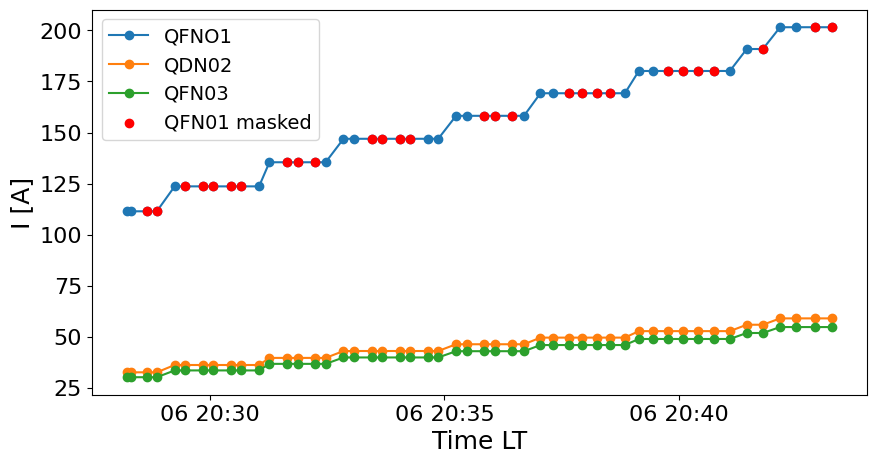

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data[0], data[3]['F61.QFN01/MEAS.PULSE#VALUE'], marker="o", label="QFNO1")
ax.plot(data[0], data[3]['F61.QDN02/MEAS.PULSE#VALUE'], marker="o", label="QDN02")
ax.plot(data[0], data[3]['F61.QFN03/MEAS.PULSE#VALUE'], marker="o", label="QFN03")


mask = [2,3, 5,6,7,8,9,12,13,14,18,19,20,21, 26,27,28, 32,33,34,35, 39,40,41,42, 45, 48,49]
datetime = [data[0][i] for i in mask]
qfn01 = [data[3]['F61.QFN01/MEAS.PULSE#VALUE'][i] for i in mask]
ax.scatter(datetime, qfn01, label="QFN01 masked", marker="o", color="r", zorder=99)

ax.legend()

ax.set_ylabel("I [A]")
ax.set_xlabel("Time LT")

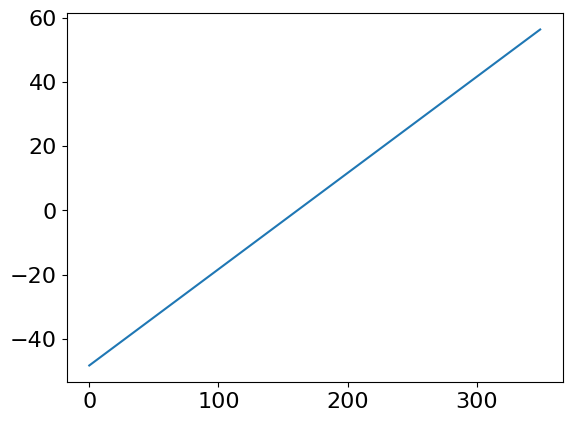

In [7]:
plt.plot(data[1]["T8.BTV035/Acquisition"][0]["projPositionSet1"][0])

In [8]:
len(data[1]["T8.BTV035/Acquisition"])

50

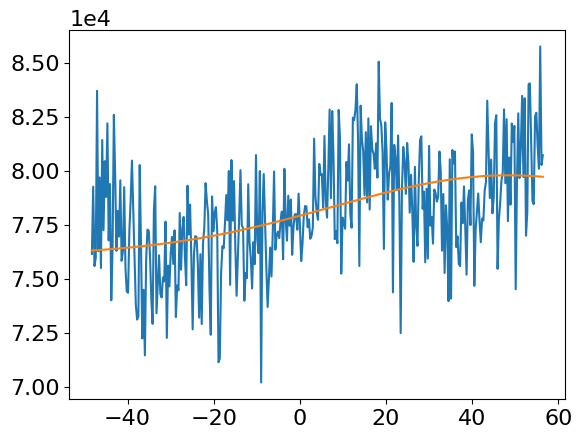

In [9]:
fig, ax = plt.subplots()

acq = 6
shot = 0

x = data[1]["T8.BTV035/Acquisition"][shot]["projPositionSet1"][acq]
y = data[1]["T8.BTV035/Acquisition"][shot]["projDataSet1"][acq]

ax.plot(x,y)


popt, pcov = do_gaussian_fit(x,y)

ax.plot(x, gaussian_function(x, popt[0], popt[1], popt[2], popt[3]))

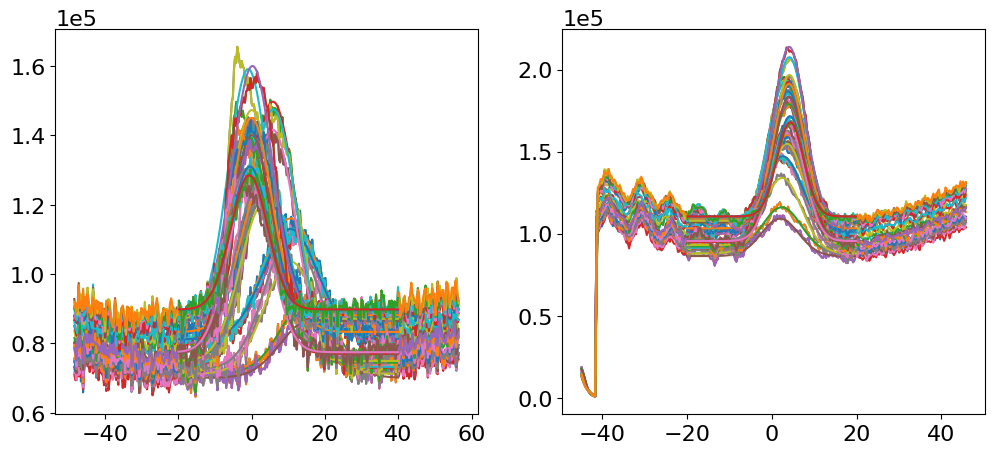

In [10]:
acq = 5

H_center_list = []
V_center_list = []

fig, ax = plt.subplots(1,2, figsize=(12,5))

BTV35 = [data[1]["T8.BTV035/Acquisition"][i] for i in mask]

for i in range(len(BTV35)):


    x = BTV35[i]["projPositionSet1"][acq]
    y = BTV35[i]["projDataSet1"][acq]

    ax[0].plot(x,y)

    # Gaussian fit
    lower_lim = -20
    upper_lim = 40
    x_f = np.array([num for num in x if lower_lim <= num <= upper_lim])
    y_f = np.array([y[i] for i, num in enumerate(x) if lower_lim <= num <= upper_lim])
    ax[0].plot(x_f,y_f)
    try:
        popt, pcov = do_gaussian_fit(x_f,y_f)
        ax[0].plot(x_f, gaussian_function(x_f, popt[0], popt[1], popt[2], popt[3]))

        H_center_list.append(popt[2])
    except:
        pass

    x = BTV35[i]["projPositionSet2"][acq]
    y = BTV35[i]["projDataSet2"][acq]

    ax[1].plot(x,y)
    
    # Gaussian fit
    lower_lim = -20
    upper_lim = 20
    x_f = np.array([num for num in x if lower_lim <= num <= upper_lim])
    y_f = np.array([y[i] for i, num in enumerate(x) if lower_lim <= num <= upper_lim])
    ax[1].plot(x_f,y_f)
    try:
        popt, pcov = do_gaussian_fit(x_f,y_f)
        ax[1].plot(x_f, gaussian_function(x_f, popt[0], popt[1], popt[2], popt[3]))

        V_center_list.append(popt[2])
    except:
        pass

   

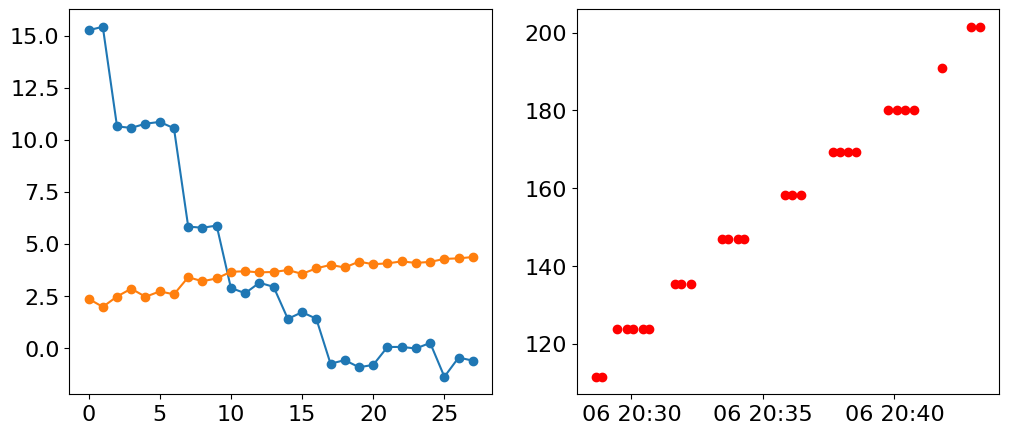

In [11]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(H_center_list, marker="o")
ax[0].plot(V_center_list, marker="o")

ax[1].scatter(datetime, qfn01, label="QFN01 masked", marker="o", color="r", zorder=99)

Text(0.5, 1.0, 'T08.BTV35')

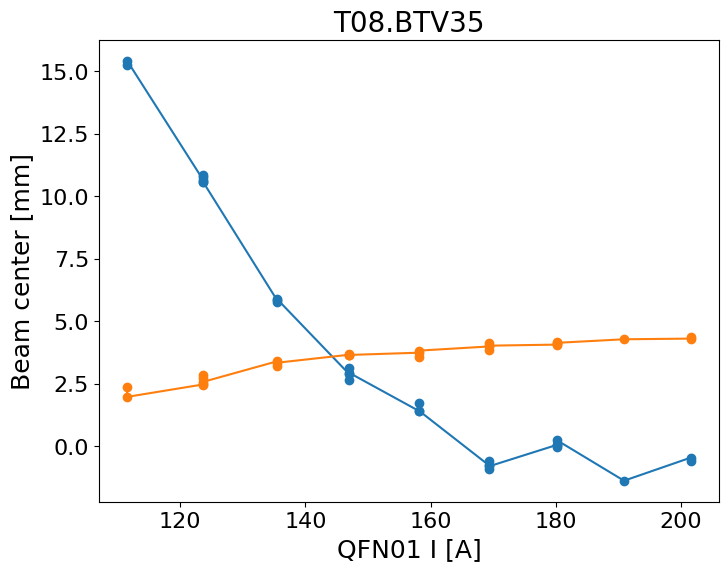

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(qfn01, H_center_list, marker="o")
ax.plot(qfn01, V_center_list, marker="o")

ax.set_xlabel("QFN01 I [A]")
ax.set_ylabel("Beam center [mm]")
ax.set_title("T08.BTV35")

# Energy log

In [13]:
import pickle
import pandas as pd

In [14]:
with open('../straggling_ion_data/energy_log.pickle', 'rb') as f:
    df = pickle.load(f)
    df['timestamp'] = df['timestamp'] + pd.to_timedelta('2 hours')

In [15]:
df.keys()

Index(['timestamp', 'Ekin'], dtype='object')

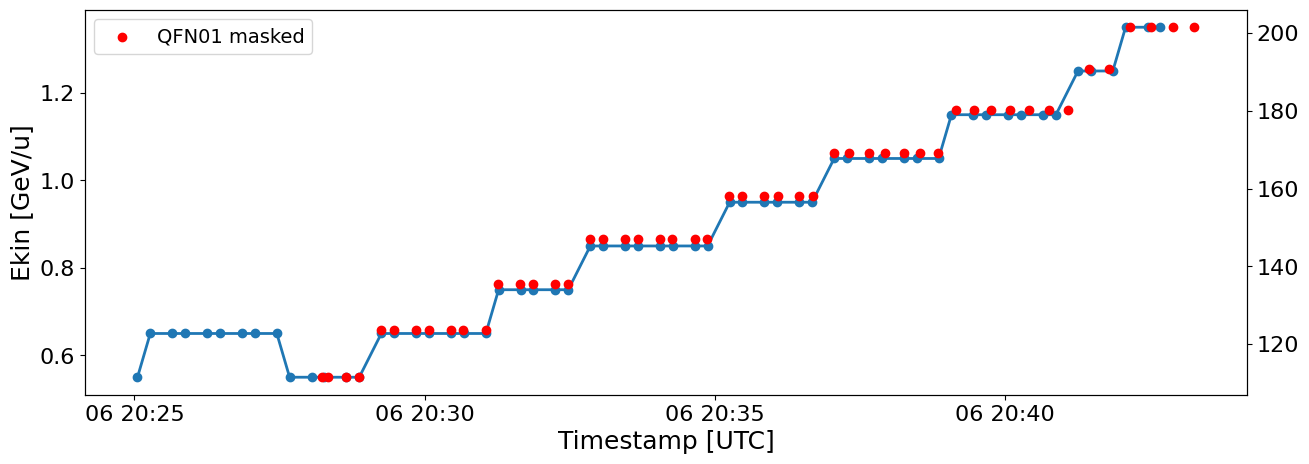

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df['timestamp'], df['Ekin'], lw=2, marker="o")
ax.set_ylabel("Ekin [GeV/u]")
ax.set_xlabel("Timestamp [UTC]")

ax2 = ax.twinx()
ax2.scatter(data[0], data[3]['F61.QFN01/MEAS.PULSE#VALUE'], label="QFN01 masked", marker="o", color="r", zorder=99)
ax2.legend()

In [17]:
type(datetime)

list

In [18]:
d = {'timestamp': datetime, 'qfn01': qfn01}
df2 = pd.DataFrame(data=d)

In [19]:
len(df.timestamp)

60

In [20]:
# Specify the tolerance (e.g., 30 minutes)
tolerance = pd.Timedelta(seconds = 10)

# Merge df2 into df1 based on the 'timestamp' column with the specified tolerance
merged_df = pd.merge_asof(df, df2, on='timestamp', direction='nearest', tolerance=tolerance)
# merged_df = merged_df.dropna()

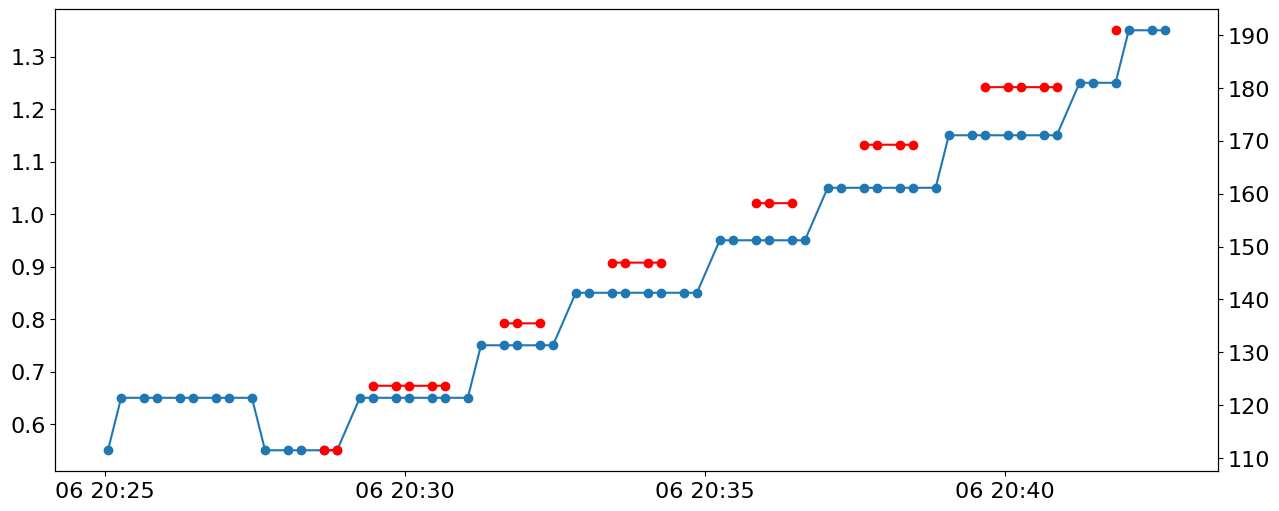

In [21]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(merged_df.timestamp, merged_df.Ekin, marker="o")

ax2 = ax.twinx()
ax2.plot(merged_df.timestamp, merged_df.qfn01, marker="o", color="r")


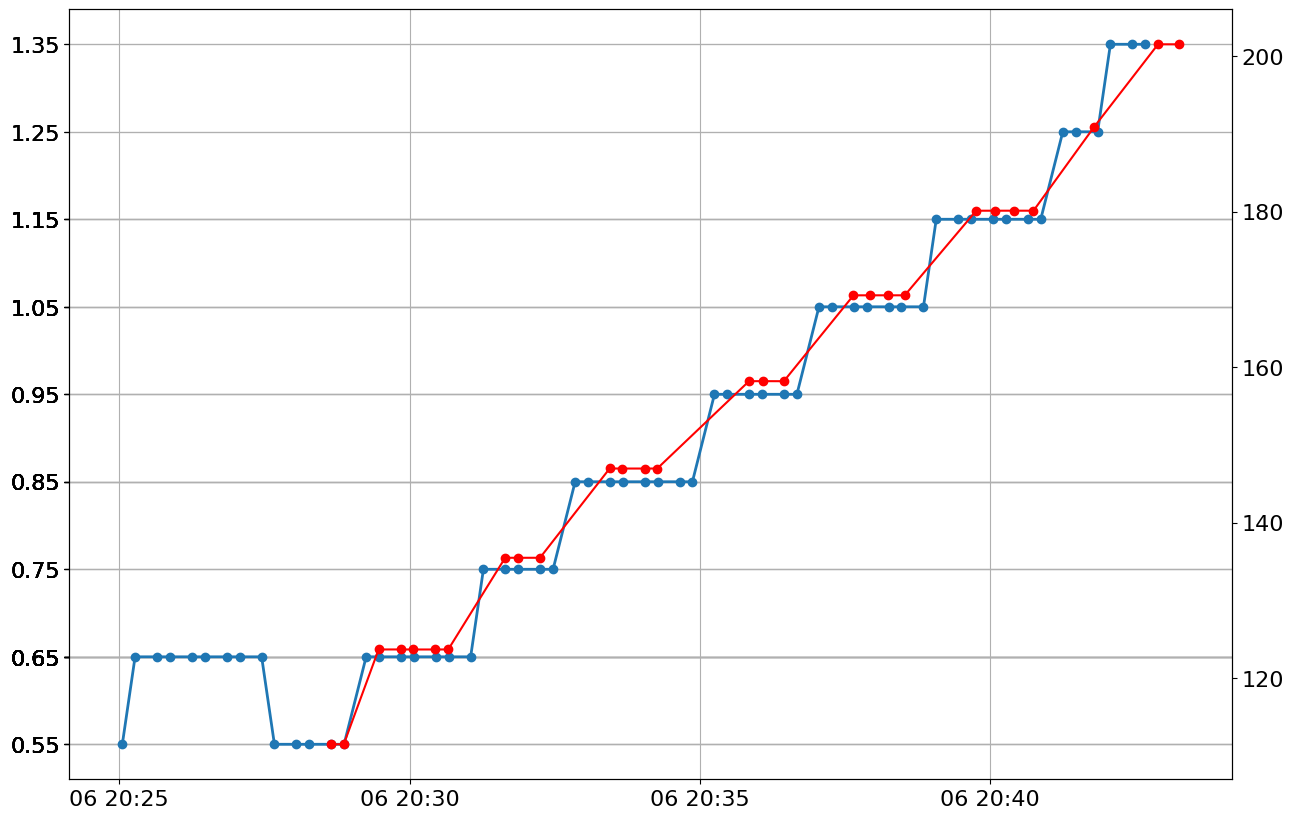

In [22]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(df['timestamp'], df['Ekin'], lw=2, marker="o")
ax2 = ax.twinx()
ax2.plot(datetime, qfn01, marker="o", c="r")

ax.grid()

# Increase y-axis resolution by specifying the number of ticks and their spacing
ax.set_yticks(df.Ekin);  # Replace your_custom_y_ticks with your desired y-axis tick values


In [23]:
df2.to_csv('straggling_df.csv', index=False)

# Now I added manually in Excel the kinetic energy

In [24]:
df_enhanced = pd.read_csv('energy_straggling_enhanced.csv')

In [25]:
df_enhanced["Hcenter"] = H_center_list
df_enhanced["Vcenter"] = V_center_list
df_enhanced['timestamp'] = pd.to_datetime(df_enhanced['timestamp'])
df_enhanced

timestamp       qfn01  Ekin    Hcenter   Vcenter
0  2023-09-06 20:28:38.856471  111.506821  0.55  15.253318  2.359200
1  2023-09-06 20:28:51.978031  111.510429  0.55  15.419223  1.967810
2  2023-09-06 20:29:27.977590  123.699837  0.65  10.633228  2.467182
3  2023-09-06 20:29:50.806069  123.702042  0.65  10.564843  2.842938
4  2023-09-06 20:30:03.983017  123.696388  0.65  10.764548  2.452909
5  2023-09-06 20:30:26.777091  123.696716  0.65  10.851230  2.711628
6  2023-09-06 20:30:39.976125  123.702240  0.65  10.546746  2.572476
7  2023-09-06 20:31:38.780882  135.492203  0.75   5.825311  3.393505
8  2023-09-06 20:31:51.978987  135.489166  0.75   5.767399  3.200594
9  2023-09-06 20:32:14.778989  135.490753  0.75   5.874128  3.335280
10 2023-09-06 20:33:26.782648  146.974060  0.85   2.880430  3.654726
11 2023-09-06 20:33:39.983782  146.967224  0.85   2.624174  3.678784
12 2023-09-06 20:34:02.784280  146.967743  0.85   3.127454  3.626956
13 2023-09-06 20:34:15.977938  146.970657  0.85   2.932810  3.645651
14 2023-09-06 20:35:50.776967  158.201233  0.95   1.393206  3.736807
15 2023-09-06 20:36:05.138119  158.205475  0.95   1.713436  3.554894
16 2023-09-06 20:36:26.781054  158.197662  0.95   1.400447  3.819840
17 2023-09-06 20:37:38.782308  169.242248  1.05  -0.758962  3.983787
18 2023-09-06 20:37:55.417156  169.243515  1.05  -0.587424  3.860740
19 2023-09-06 20:38:14.778321  169.245758  1.05  -0.929114  4.140682
20 2023-09-06 20:38:31.751149  169.244095  1.05  -0.816971  4.017071
21 2023-09-06 20:39:45.594832  180.123138  1.15   0.044471  4.058821
22 2023-09-06 20:40:05.319131  180.125397  1.15   0.045773  4.152416
23 2023-09-06 20:40:24.725137  180.127487  1.15  -0.028584  4.080495
24 2023-09-06 20:40:44.801513  180.126129  1.15   0.238702  4.129935
25 2023-09-06 20:41:47.333825  190.873978  1.25  -1.387269  4.272790
26 2023-09-06 20:42:53.518819  201.527893  1.35  -0.463388  4.299400
27 2023-09-06 20:43:15.325348  201.520935  1.35  -0.614253  4.362629

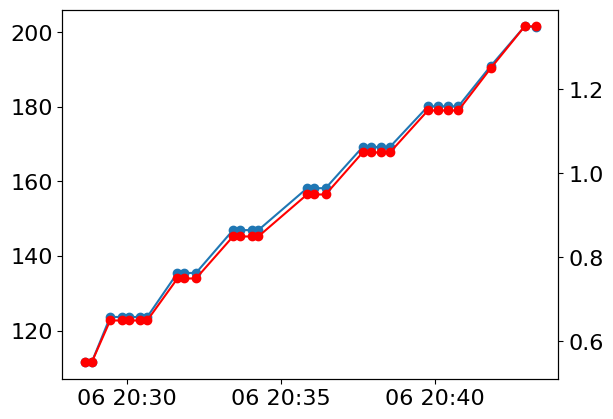

In [26]:
fig, ax = plt.subplots()

ax.plot(df_enhanced.timestamp, df_enhanced.qfn01, marker="o")
ax2 = ax.twinx()
ax2.plot(df_enhanced.timestamp, df_enhanced.Ekin, marker="o", c="r")


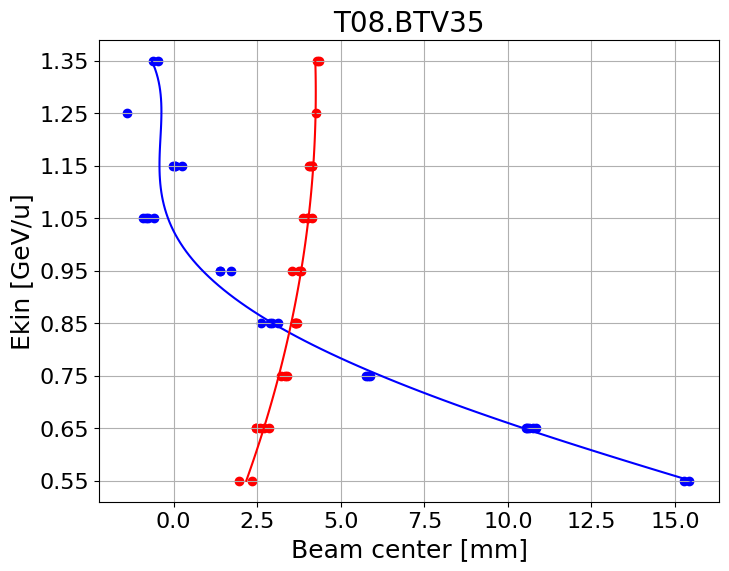

In [27]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(df_enhanced.Hcenter, df_enhanced.Ekin, marker="o", c="b")
ax.scatter(df_enhanced.Vcenter, df_enhanced.Ekin, marker="o", c="r")

# Fit a second-order polynomial to Hcenter
coeffs_h = np.polyfit(df_enhanced.Ekin, df_enhanced.Hcenter, 4)

# Fit a second-order polynomial to Vcenter
coeffs_v = np.polyfit(df_enhanced.Ekin, df_enhanced.Vcenter, 2)

# Create a range of Ekin values for the fitted curves
Ekin_range = np.linspace(df_enhanced.Ekin.min(), df_enhanced.Ekin.max(), 100)

# Calculate the corresponding Hcenter and Vcenter values using the fitted polynomials
Hcenter_fit = np.polyval(coeffs_h, Ekin_range)
Vcenter_fit = np.polyval(coeffs_v, Ekin_range)

ax.plot(Hcenter_fit, Ekin_range, label="Hcenter Fit", c="b")
ax.plot(Vcenter_fit, Ekin_range, label="Vcenter Fit", c="r")

ax.grid()
ax.set_yticks(list(df_enhanced.Ekin.unique()));

ax.set_xlabel("Beam center [mm]")
ax.set_ylabel("Ekin [GeV/u]")
ax.set_title("T08.BTV35")

plt.savefig("Ekin_vs_beam_center_btv35_acq"+str(acq)+".png", facecolor='white', transparent=False, dpi = 300, bbox_inches='tight')

In [28]:
df_enhanced["acq"] = np.ones(len(df_enhanced))*acq

In [29]:
with open("Ekin_vs_beam_center_btv35_acq"+str(acq)+".pickle", 'wb') as handle:
    pickle.dump(df_enhanced, handle, protocol=pickle.HIGHEST_PROTOCOL)